In [29]:
# подключение библиотек
using DifferentialEquations

In [30]:
using Plots 

In [31]:
using Catalyst

In [32]:
# символьная запись химической реакции с использованием макроса @reaction_network
rn = @reaction_network begin
  1.0, X --> 2X
  2.0, X --> 0
  100.0, 0 --> X
end

Model ##ReactionSystem#271:
Unknowns (1): see unknowns(##ReactionSystem#271)
  X(t)

In [33]:
# эквивалентый вариант записи системы
rn = @reaction_network begin
    (1.0, 2.0, 100.0), (X, X, 0) --> (2X, 0, X)
end

Model ##ReactionSystem#277:
Unknowns (1): see unknowns(##ReactionSystem#277)
  X(t)

In [34]:
# преобразование системы реакций в дифференциальное уравнение
rnsys = structural_simplify(convert(ODESystem, rn))

Model ##ReactionSystem#277:
Equations (1):
  1 standard: see equations(##ReactionSystem#277)
Unknowns (1): see unknowns(##ReactionSystem#277)
  X(t)

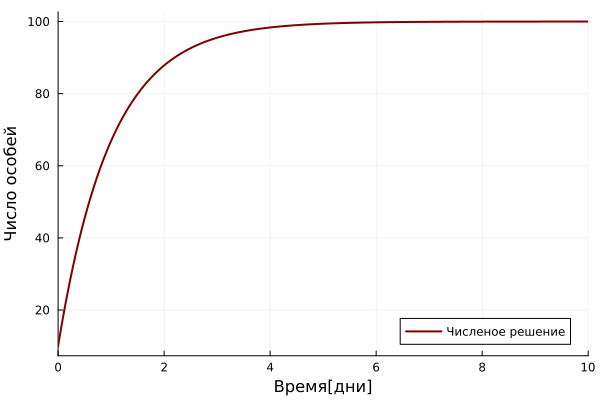

In [35]:
# численное моделирование
@variables t
@species X(t)
u0 = [X => 10]
tspan = (0, 10.0)
rnprob = ODEProblem(rnsys, u0, tspan)

sol = solve(rnprob, Tsit5())

plot(sol, 
    label = "Численое решение", 
    xlabel="Время[дни]",
    ylabel="Число особей",
    linewidth=2,
    color = "maroon")

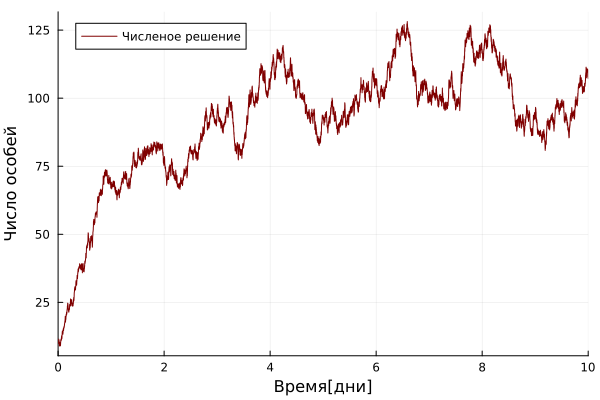

In [37]:
# преобразование системы химических реакций в стохастическое дифференциальное уравнение в форме Ланжевена
sprob = SDEProblem(rn, u0, tspan)
sol_stoch = solve(sprob, EM(), dt = 0.001)
plot(sol_stoch,
    label = "Численое решение", 
    xlabel="Время[дни]",
    ylabel="Число особей",
    linewidth=1,
    color = "maroon")

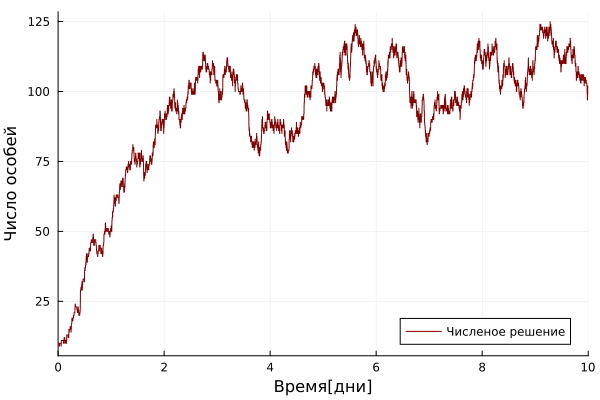

In [38]:
# преобразование модели в скачкообразный процесс
dprob = DiscreteProblem(rn, u0, tspan)
jprob = JumpProblem(rn, dprob, Direct())
jsol = solve(jprob, SSAStepper())
plot(jsol,
    label = "Численое решение", 
    xlabel="Время[дни]",
    ylabel="Число особей",
    linewidth=1,
    color = "maroon")

In [39]:
lv = @reaction_network begin
	1.5, X + Y --> 2*Y
	3, Y --> 0
	1.5, X + Z --> 2*X
	3, Z --> 2*Z
	1, X --> 0
	end

Model ##ReactionSystem#287:
Unknowns (3): see unknowns(##ReactionSystem#287)
  X(t)
  Y(t)
  Z(t)

In [40]:
lvsys = convert(ODESystem, lv)

Model ##ReactionSystem#287:
Equations (3):
  3 standard: see equations(##ReactionSystem#287)
Unknowns (3): see unknowns(##ReactionSystem#287)
  X(t)
  Y(t)
  Z(t)

In [41]:
function condition(u, t, integrator)
    any(u .< 0)
end

function affect!(integrator)
    integrator.u .= max.(integrator.u, 0)
end

cb = DiscreteCallback(condition, affect!)

# определяем символьные переменные
@variables t
@species X(t) Y(t) Z(t)
#задаем начальные условия
u0 = [X => 1.0, Y => 1.0, Z => 1.0]
tspan = (0.0, 16.0) 
lvsdeprob = SDEProblem(lv, u0, tspan)
lvoprob = ODEProblem(lv, u0, tspan);

In [42]:
sol_lv_ode = solve(lvoprob, Tsit5());

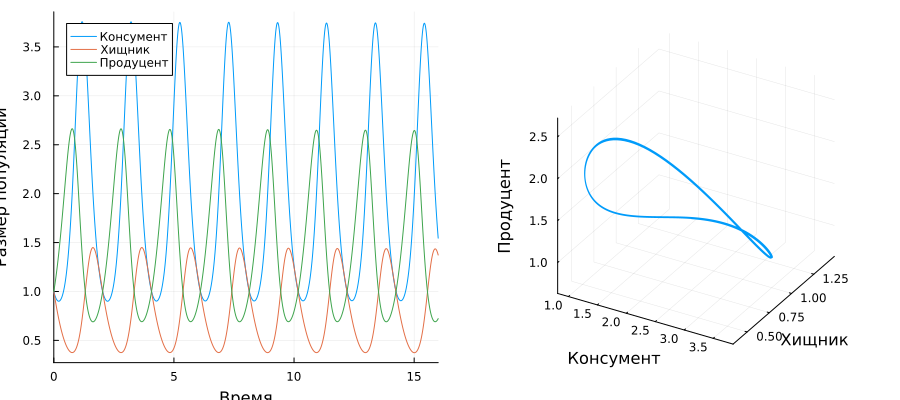

In [43]:
p1 = plot(sol_lv_ode,  xaxis="Время",yaxis="Размер популяции",  label=["Консумент" "Хищник" "Продуцент"])
p2 = plot(sol_lv_ode,  legend=false, xaxis="Консумент", yaxis="Хищник", zaxis = "Продуцент", idxs=(1,2,3))
plot(p1, p2, layout=(1, 2), size=(900, 400))

In [44]:
sol_lv_sde = solve(lvsdeprob, EM(), dt = 0.001, callback = cb);

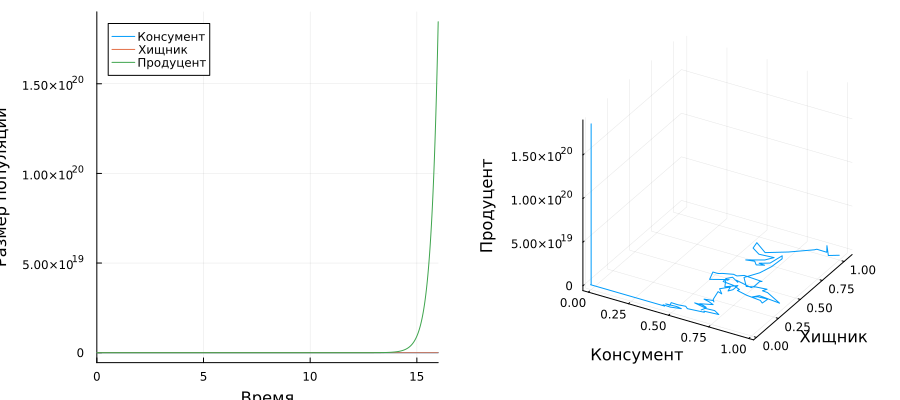

In [45]:
p1 = plot(sol_lv_sde,  xaxis="Время",yaxis="Размер популяции",  label=["Консумент" "Хищник" "Продуцент"])
p2 = plot(sol_lv_sde,  legend=false, xaxis="Консумент", yaxis="Хищник", zaxis = "Продуцент", idxs=(1,2,3))
plot(p1, p2, layout=(1, 2), size=(900, 400))

In [46]:
sol_lv_sde_2 = solve(lvsdeprob, EM(), dt = 0.001, callback = cb);

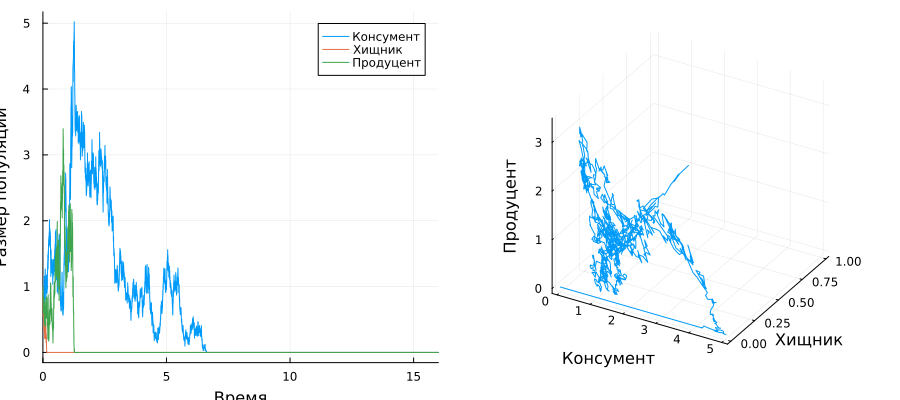

In [47]:
p1 = plot(sol_lv_sde_2,  xaxis="Время",yaxis="Размер популяции",  label=["Консумент" "Хищник" "Продуцент"])
p2 = plot(sol_lv_sde_2,  legend=false, xaxis="Консумент", yaxis="Хищник", zaxis = "Продуцент", idxs=(1,2,3))
plot(p1, p2, layout=(1, 2), size=(900, 400))